## HOTEL RECOMMENDATION PROJECT

Dataset source: 
https://www.kaggle.com/datasets/ericthedataguy/cleaned-hotel-review-for-ba820

### STEP I : EDA (Exploratory Data Analysis / tutkiva datan analyysi)

Tässä osiossa käydään dataa läpi yksityiskohtaisemmin kuin mitä lopullinen käyttö vaatii, mikä voi auttaa saamaan kokonaisvaltaisen kuvan aineistosta ja ymmärtämään sen potentiaalia.

Alustetaan projektin ympäristö ja tuodaan käyttöön keskeiset kirjastot datan käsittelyyn ja visualisointiin. Virtuaaliympäristön luominen varmistaa tarvitsemien kirjastojen versioiden hallinnan, ja valitut kirjastot mahdollistavat datan tutkimisen ja esittämisen selkeästi. Varoitusten ohittaminen pitää tulosteet siistinä.


In [295]:
# creating a new virtual environment named "env"
# python3 -m venv env
# activating the virtual environment
# source env/bin/activate 

# importing essential libraries for data analysis and visualization
# pip3 install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the warnings library to control warning messages
import warnings
# using the filterwarnings function to ignore all warnings
warnings.filterwarnings('ignore')

# logging all packages and their versions in the current virtual environment
# pip3 freeze > requirements.txt
# to install all dependencies for the project with the correct versions in other environment
# pip3 install -r requirements.txt

In [296]:
# loading and displaying basic information of the dataset
hotels_original = pd.read_csv('hotel_reviews.csv')
hotels_original.sample(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Longitude,Latitude
387910,Nieuwezijdskolk 19 Amsterdam City Center 1012 ...,538,9/20/2015,8.2,Inntel Hotels Amsterdam Centre,Saudi Arabia,Room too small,4,3342,Nice area,3,7,8.3,"[' Business trip ', ' Solo traveler ', ' Singl...",683 day,4.894392,52.376046
132740,291 Greenwich High Road Greenwich Greenwich Lo...,253,11/14/2016,8.2,Innkeeper s Lodge London Greenwich,United Kingdom,The room we had was small with only enough ro...,31,1191,The location was great for access to all the ...,35,2,5.5,"[' Leisure trip ', ' Family with young childre...",262 day,-0.009720,51.480163
421521,Prinsengracht 587 Amsterdam City Center 1067 H...,145,1/26/2016,9.3,Andaz Amsterdam Prinsengracht A Hyatt Hotel,Greece,No Negative,0,851,great location amazing design friendly staff,7,28,9.6,"[' Leisure trip ', ' Group ', ' Large Canal Vi...",555 day,4.883079,52.367837
234223,7 9 High Street Kensington Kensington and Chel...,98,5/9/2017,7.4,Seraphine Kensington Gardens Hotel,United Kingdom,Breakfast croissants were stale when we arriv...,35,597,Such a perfect location Portuguese receptioni...,21,4,10.0,"[' Leisure trip ', ' Couple ', ' Executive Dou...",86 days,-0.187901,51.502103
221568,6 rue Gustave Charpentier 17th arr 75017 Paris...,59,10/24/2015,8.5,AC Hotel Paris Porte Maillot by Marriott,Hong Kong,Lighting in room could be better Limited TV s...,10,403,Good location Friendly and helpful staff,7,34,7.9,"[' Business trip ', ' Solo traveler ', ' Stand...",649 day,2.281854,48.882005


In [297]:
# displaying basic information
hotels_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [298]:
# creating own variable for modification
hotels_cleaned = hotels_original.copy()

# Copying the original dataset isn't necessary for this project since maintaining the original data unchanged isn't required. 
# However, it exemplifies good practice.

In [299]:
# Duplicates handling

# calculating the number of rows before removing duplicates
rows_before = len(hotels_cleaned)

# checking for and removing full duplicate rows to avoid skewing the analysis
hotels_cleaned.drop_duplicates(inplace=True)

# calculating the number of rows after removing duplicates
rows_after = len(hotels_cleaned)

# calculating the number of duplicates removed
duplicates_removed = rows_before - rows_after

# printing the outcome of the duplicate removal process
if duplicates_removed > 0:
    print(f"{duplicates_removed} duplicates removed.")
else:
    print("No duplicates detected.")


526 duplicates removed.


In [300]:
# printing the unique hotel names
print(hotels_cleaned['Hotel_Name'].unique())

# counting and printing the total number of unique hotels
total_unique_hotels = hotels_cleaned['Hotel_Name'].nunique()
print(f"Total number of unique hotels: {total_unique_hotels}")

['Hotel Arena' 'K K Hotel George' 'Apex Temple Court Hotel' ...
 'The Berkeley' 'Holiday Inn London Kensington' 'Atlantis Hotel Vienna']
Total number of unique hotels: 1492


Seuraavaksi luodaan histogrammi hotellien keskiarvoisten arvostelujen jakautumisesta, mukana tiheyskäyrä (KDE - Kernel Density Estimate) arvostelujen tiheyden ymmärtämiseksi.

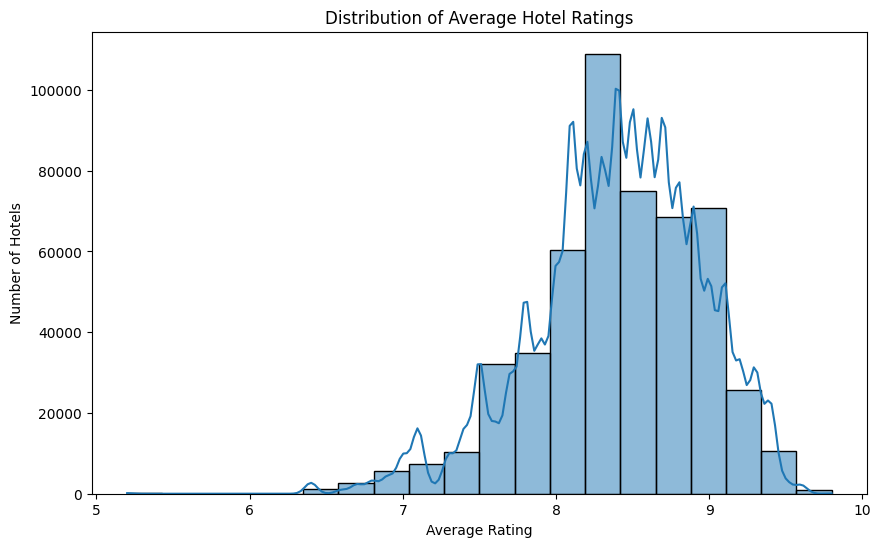

In [301]:
# setting the size of the figure for the plot
plt.figure(figsize=(10, 6))
# creating a histogram to visualize the distribution of average hotel ratings, 
# with a Kernel Density Estimate (KDE) line to show the density distribution
sns.histplot(hotels_cleaned['Average_Score'], bins=20, kde=True)
# setting the title of the plot
plt.title('Distribution of Average Hotel Ratings')
# labeling the x-axis as "Average Rating"
plt.xlabel('Average Rating')
# labeling the y-axis as "Number of Hotels"
plt.ylabel('Number of Hotels')
# displaying the plot
plt.show()

Histogrammi osoittaa, että suurin osa hotelleista on saanut keskiarvoisen arvosanan kahdeksan ja yhdeksän välillä, mikä viittaa yleisesti positiiviseen asiakasarvosteluun. Tiheyskäyrä kertoo, että eniten hotelleja on ryhmittynyt noin 8,5 arvosanan ympärille. Harvemmat hotellit saavat erittäin korkeita tai matalia keskiarvoisia arvosanoja.

In [302]:
# extracting the country from the hotel address 
hotels_cleaned['Country'] = hotels_cleaned['Hotel_Address'].apply(lambda x: " ".join(x.split()[-2:]) if x.split()[-1] == "Kingdom" else x.split()[-1])

# defining the order of columns, placing 'Country' right after 'Hotel_Address'
col_order = ['Hotel_Address', 'Country'] + [col for col in hotels_cleaned.columns if col not in ['Hotel_Address', 'Country']]

# reordering the DataFrame using the new columns order
hotels_cleaned = hotels_cleaned[col_order]

# printing the unique countries
unique_countries = hotels_cleaned['Country'].unique()
print(unique_countries)

# counting the total number of unique countries
total_unique_countries = hotels_cleaned['Country'].nunique()
print(f"Total number of unique countries: {total_unique_countries}")

['Netherlands' 'United Kingdom' 'France' 'Spain' 'Italy' 'Austria']
Total number of unique countries: 6


In [303]:
# calculating the number of unique hotels in each country
unique_hotels_per_country = hotels_cleaned.groupby('Country')['Hotel_Name'].nunique()

# printing the resulting counts
print(unique_hotels_per_country)

Country
Austria           158
France            458
Italy             162
Netherlands       105
Spain             211
United Kingdom    400
Name: Hotel_Name, dtype: int64


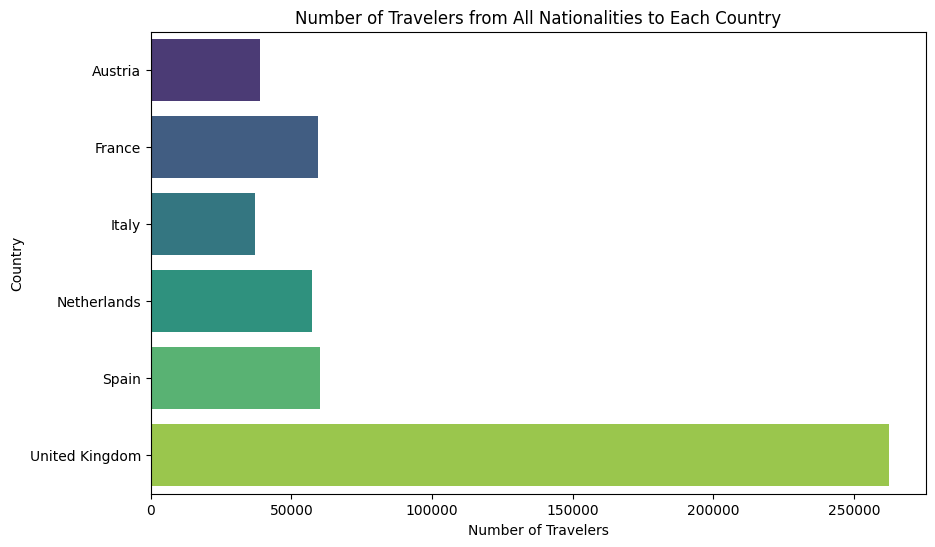

In [304]:
# Distribution of all travelers in each country visualisation

travelers_to_countries = hotels_cleaned.groupby('Country').size()
# setting the size of the figure for the plot
plt.figure(figsize=(10, 6)) 
# creating a barplot to visualize the number of travelers
sns.barplot(x=travelers_to_countries.values, y=travelers_to_countries.index, palette='viridis')
# setting the title of the plot
plt.title('Number of Travelers from All Nationalities to Each Country')
# labeling the x-axis
plt.xlabel('Number of Travelers')
# labeling the y-axis
plt.ylabel('Country')
# displaying the plot
plt.show()


UK on selvästi suosituin kohde matkailijoiden keskuudessa, jota seuraavat Espanja ja Ranska merkittävästi pienemmällä matkailijamäärällä. Tämä ero saattaa ehkä johtua siitä, että aineisto on mahdollisesti peräisin brittiläisistä lähteistä, mikä voisi vääristää tuloksia suosimaan UK:ta.

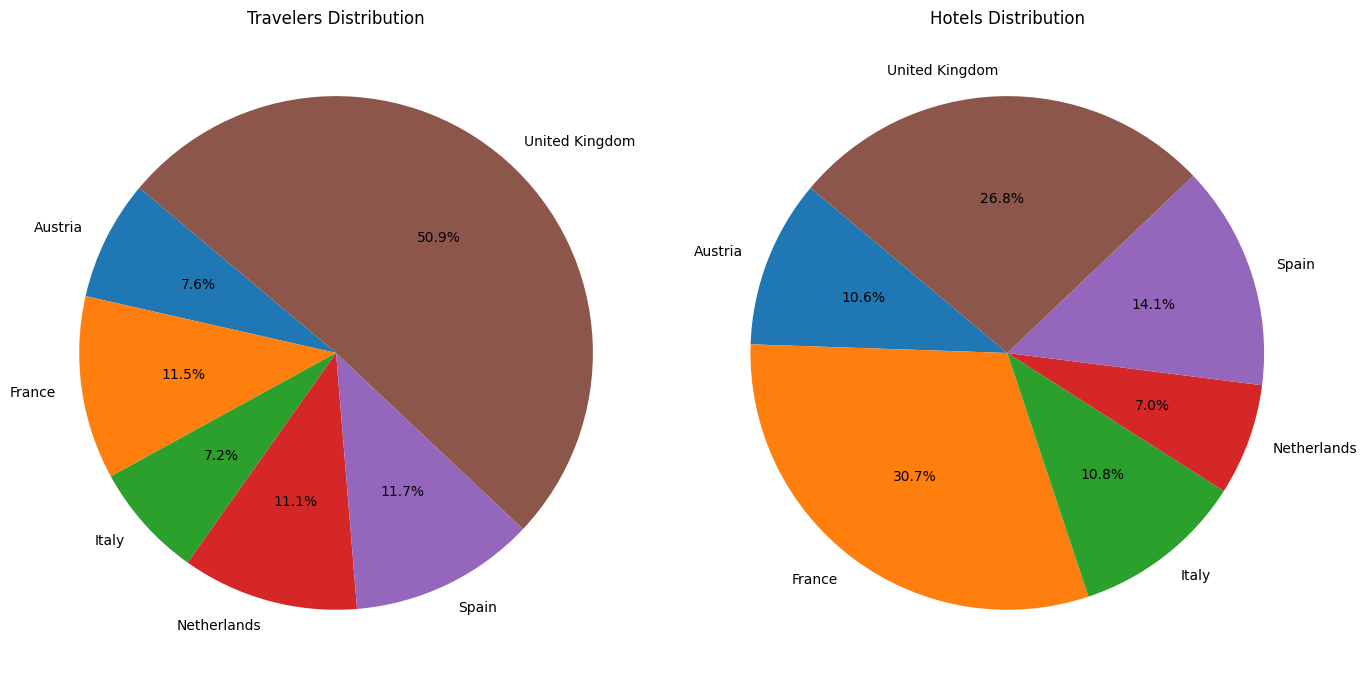

In [305]:
# Travelers to Hotels Ratio: A Closer Look

# calculating percentages
unique_hotels_percent = (unique_hotels_per_country / unique_hotels_per_country.sum()) * 100
travelers_percent = (travelers_to_countries / travelers_to_countries.sum()) * 100

# creating subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# creating travelers pie chart on the left
axs[0].pie(travelers_percent, labels=travelers_percent.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Travelers Distribution')

# creating hotels pie chart on the right
axs[1].pie(unique_hotels_percent, labels=unique_hotels_percent.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Hotels Distribution')

# adjusting layout to prevent overlap
plt.tight_layout()

# displayштп the plot
plt.show()


UK:ssa hotelleja on suhteessa vähemmän kuin matkailijoita, mikä viittaa korkeaan käyttöasteeseen, kun taas Ranskassa hotellien määrä ylittää matkailijoiden määrän, mikä voi heijastaa suurempaa tarjontaa. Espanjassa ja Itävallassa matkailijoiden ja hotellien suhteet ovat lähellä toisiaan, mikä osoittaa tasapainoista suhdetta.

In [306]:
# counting of each nationality amounts
travelers_per_nationality = hotels_cleaned['Reviewer_Nationality'].value_counts()

# printing the head and the tail of resulting counts
print(travelers_per_nationality.head())
print(travelers_per_nationality.tail())

Reviewer_Nationality
United Kingdom               245110
United States of America      35349
Australia                     21648
Ireland                       14814
United Arab Emirates          10229
Name: count, dtype: int64
Reviewer_Nationality
Cape Verde                   1
Northern Mariana Islands     1
Tuvalu                       1
Guinea                       1
Palau                        1
Name: count, dtype: int64


In [307]:
# counting the amount of travelers from each nationality travelling to every country, 
# with missing nationalities filled in as 0 to maintain a complete matrix
nationalities_to_countries = hotels_cleaned.groupby('Country')['Reviewer_Nationality'].value_counts().unstack(fill_value=0)

# printing the resulting counts
nationalities_to_countries

Reviewer_Nationality,,Abkhazia Georgia,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,...,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Austria,33,13,1,100,3,1,3,4,1,2,...,6,3,1,1,10,25,0,1,1,2
France,61,20,1,27,27,0,5,12,0,0,...,11,0,1,0,16,52,0,3,5,7
Italy,44,6,0,68,3,1,0,6,0,0,...,16,2,1,0,13,26,0,6,5,5
Netherlands,69,23,1,26,9,0,5,3,0,0,...,7,0,0,0,13,14,1,1,2,2
Spain,57,25,3,30,32,0,38,10,0,0,...,15,3,2,0,17,16,0,2,4,3
United Kingdom,258,66,2,34,26,0,13,27,0,1,...,36,12,3,0,9,54,1,3,20,32


In [308]:
# extracting the names of the top 20 nationalities
top_20_nationalities = hotels_cleaned['Reviewer_Nationality'].value_counts().nlargest(20).index

# printing result
top_20_nationalities

Index([' United Kingdom ', ' United States of America ', ' Australia ',
       ' Ireland ', ' United Arab Emirates ', ' Saudi Arabia ',
       ' Netherlands ', ' Switzerland ', ' Germany ', ' Canada ', ' France ',
       ' Israel ', ' Italy ', ' Belgium ', ' Turkey ', ' Kuwait ', ' Spain ',
       ' Romania ', ' Russia ', ' South Africa '],
      dtype='object', name='Reviewer_Nationality')

In [309]:
# filtering the hotels DataFrame for top 20 nationalities
hotels_filtered = hotels_cleaned[hotels_cleaned['Reviewer_Nationality'].isin(top_20_nationalities)]

# counting travelers by country and top 20 reviewer nationalities
nationalities_to_countries_filtered = hotels_filtered.groupby(['Country', 'Reviewer_Nationality']).size().unstack()

# checking result
nationalities_to_countries_filtered

Reviewer_Nationality,Australia,Belgium,Canada,France,Germany,Ireland,Israel,Italy,Kuwait,Netherlands,Romania,Russia,Saudi Arabia,South Africa,Spain,Switzerland,Turkey,United Arab Emirates,United Kingdom,United States of America
Country,,,,,,,,,,,,,,,,,,,,
Austria,1680,476,787,518,1040,710,1029,664,331,808,1807,819,588,256,319,795,715,1163,7507,3104
France,3866,1158,1324,1829,1233,1314,684,712,639,1471,315,568,1983,593,450,1212,823,1533,16774,7192
Italy,2677,514,483,724,944,607,705,1451,508,777,784,631,1124,312,304,1760,870,1241,6205,3081
Netherlands,2045,1091,1114,762,1281,3029,1213,652,472,1732,456,530,841,616,439,743,936,1097,23015,4792
Spain,2907,750,1457,1080,1102,2134,1173,743,568,1232,583,556,1202,543,1778,1167,820,1331,20961,6169
United Kingdom,8473,2035,2718,2352,2329,7020,1797,1891,2397,2737,603,794,3202,1496,1445,2992,1276,3864,170648,11011


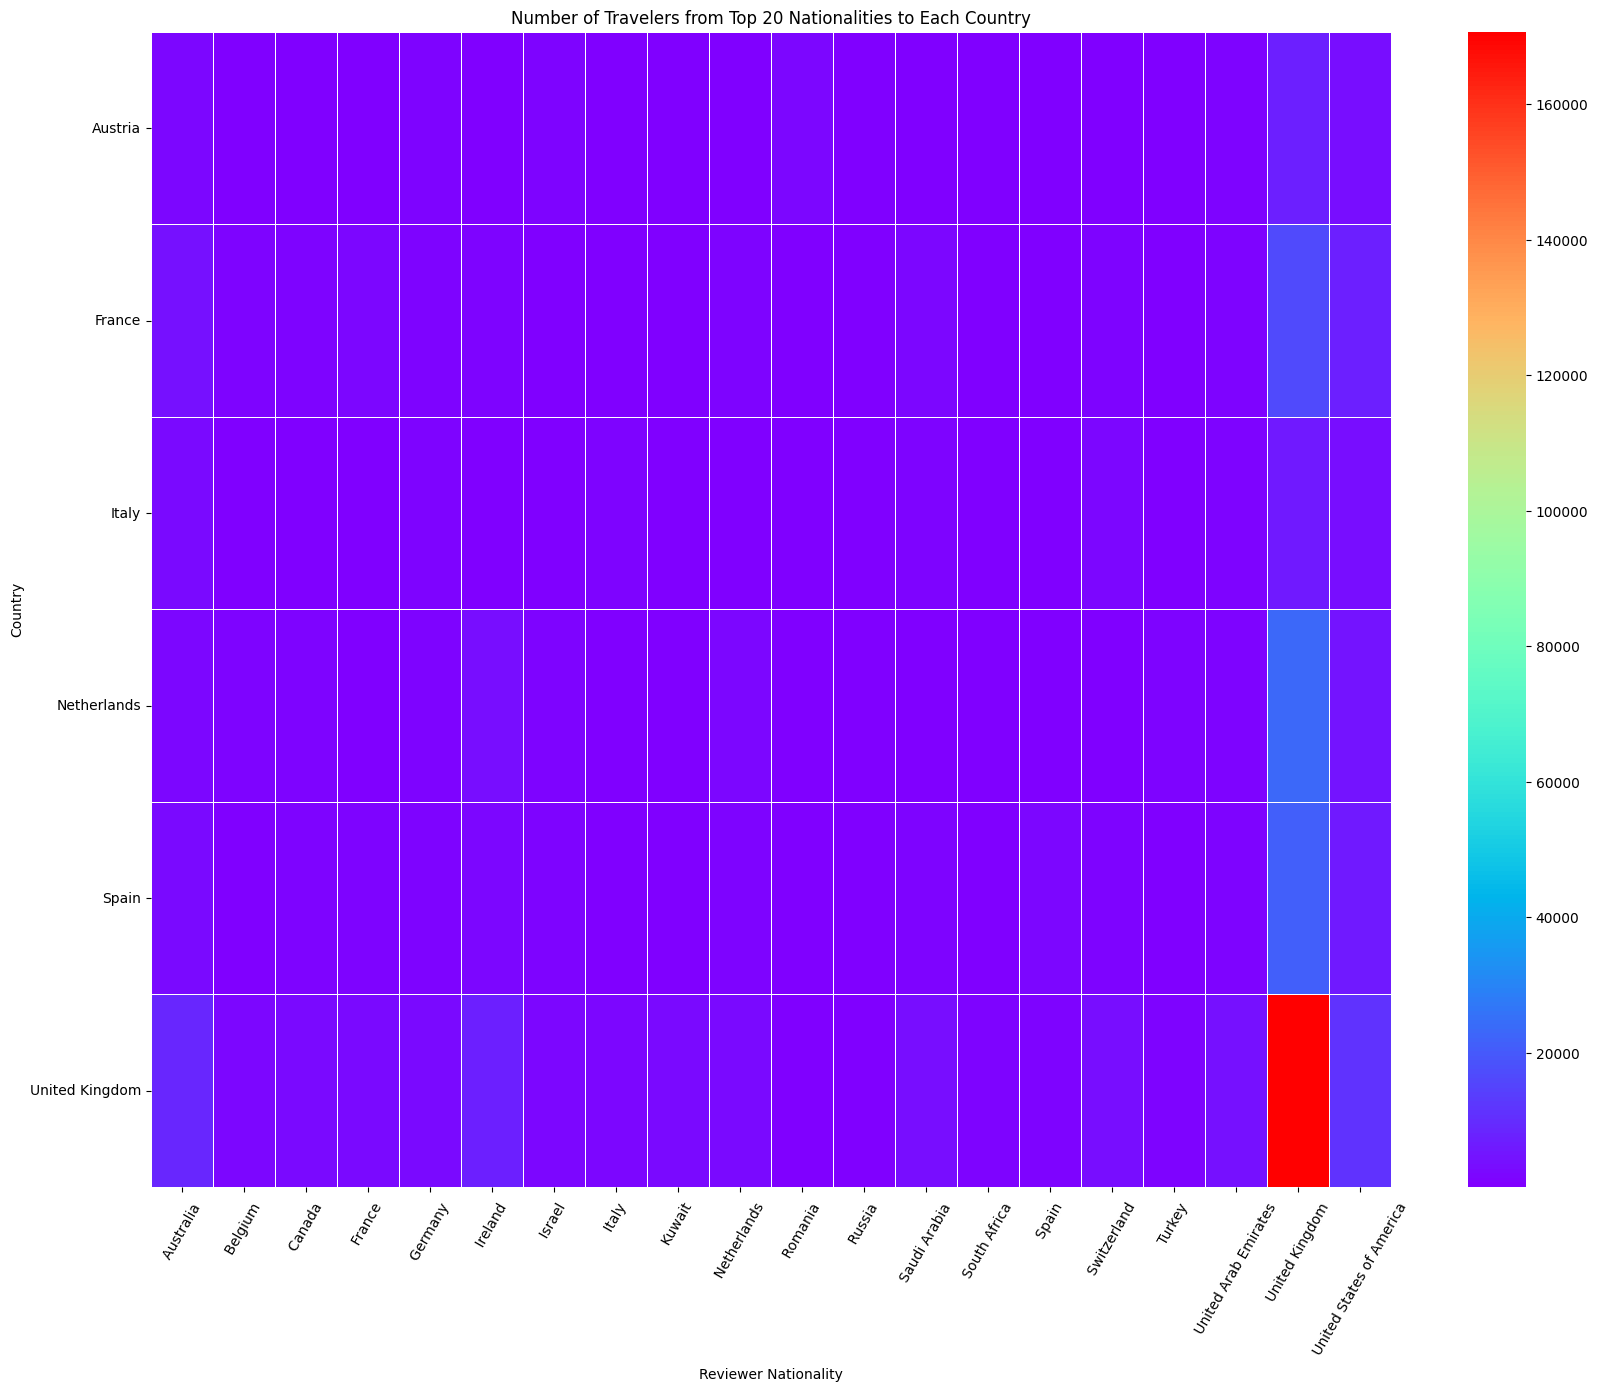

In [311]:
# Heatmap of Travelers by Nationality and Country

# setting the size of the figure for the plot
plt.figure(figsize=(20, 15))
# creating a heatmap to visualize distribution of travelers by nationality and country
sns.heatmap(nationalities_to_countries_filtered, annot=False, cmap="rainbow", linewidths=.5)
# setting the title of the plot
plt.title('Number of Travelers from Top 20 Nationalities to Each Country')
# labeling the x-axis
plt.xlabel('Reviewer Nationality')
# labeling the y-axis
plt.ylabel('Country')
# setting the angle for the x-axis
plt.xticks(rotation=60)
# setting the angle for the y-axis
plt.yticks(rotation=0)
# displaying the plot
plt.show()

Lämpökartta on vahvasti UK painotteinen, pudotetaan brittiläiset matkustajat ja tarkistetaan tilannetta sen jälkeen. 


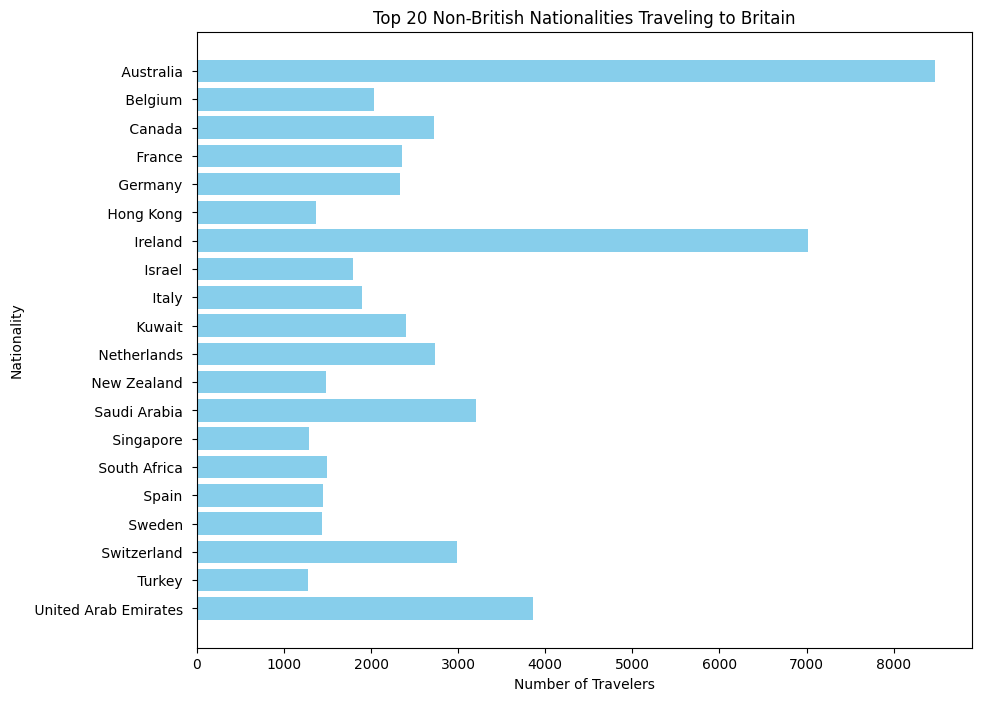

In [312]:
# Step 1: filtering for reviews related to Britain and exclude British travelers
britain_reviews = hotels_cleaned[hotels_cleaned['Country'] == 'United Kingdom']
non_british_reviews_to_britain = britain_reviews[britain_reviews['Reviewer_Nationality'].str.strip() != 'United Kingdom']

# Step 2: identifying the top 20 non-British nationalities traveling to Britain
top_20_nationalities = (non_british_reviews_to_britain['Reviewer_Nationality']
                        .value_counts()
                        .nlargest(21)  # getting top 21 to exclude British if included accidentally
                        .iloc[1:])  # excluding British explicitly, ensuring top 20 non-British
top_20_nationalities_names = top_20_nationalities.index.tolist()

# filtering reviews to include only top 20 non-British nationalities
filtered_reviews = non_british_reviews_to_britain[non_british_reviews_to_britain['Reviewer_Nationality'].isin(top_20_nationalities_names)]

# Step 3: preparing Data for Visualization
# counting how many travelers from each of the top 20 nationalities traveled to Britain
nationalities_count = (filtered_reviews.groupby('Reviewer_Nationality')['Hotel_Name'].count().reset_index().sort_values('Reviewer_Nationality', ascending=False))
nationalities_count.columns = ['Nationality', 'Number of Travelers']

# Step 4: visualizing the Data
# plotting a horizontal bar chart for better visibility
plt.figure(figsize=(10, 8))
# creating a bar plot
plt.barh(nationalities_count['Nationality'], nationalities_count['Number of Travelers'], color='skyblue')
# labeling x-axis
plt.xlabel('Number of Travelers')
# labeling y_axis
plt.ylabel('Nationality')
# setting the title
plt.title('Top 20 Non-British Nationalities Traveling to Britain')
# displaying the plot
plt.show()

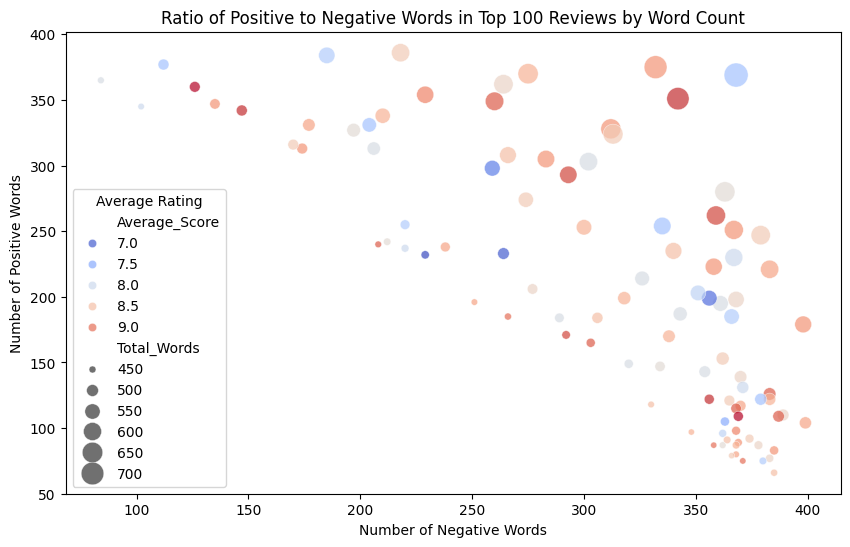

In [313]:
# Ratio of Positive to Negative Words in Reviews

# calculating the total number of words by summing up the positive and negative word counts
hotels_cleaned['Total_Words'] = hotels_cleaned['Review_Total_Positive_Word_Counts'] + hotels_cleaned['Review_Total_Negative_Word_Counts']
# selecting the top 100 reviews with the highest word count
top_reviews = hotels_cleaned.sort_values(by='Total_Words', ascending=False).head(100)

# setting the figure size for the scatter plot
plt.figure(figsize=(10, 6))
# creating a scatter plot with color representing the average score, and the size representing the total number of words
sns.scatterplot(data=top_reviews, x='Review_Total_Negative_Word_Counts', y='Review_Total_Positive_Word_Counts', hue='Average_Score', size='Total_Words', sizes=(20, 300), alpha=0.7, palette='coolwarm')
# setting the title
plt.title('Ratio of Positive to Negative Words in Top 100 Reviews by Word Count')
# labeling x-axis
plt.xlabel('Number of Negative Words')
# labeling y-axis
plt.ylabel('Number of Positive Words')
# adding the legend
plt.legend(title='Average Rating')
# displaying the plot
plt.show()

Visualisoinnissa havaitaan, että korkeammat keskiarvopisteet korreloivat suuremman positiivisten sanojen määrän kanssa, vaikkakin negatiivisten sanojen määrä on melko samankaltainen läpi eri keskiarvopisteiden. Suurimmat ympyrät, jotka edustavat arvosteluiden suurinta sanamäärää, näyttävät keskittyvän korkeampien keskiarvopisteiden ympärille, mikä viittaa siihen, että laajemmat arvostelut ovat usein positiivisempia. Tämä voi kertoa, että tyytyväisemmät asiakkaat kirjoittavat yksityiskohtaisempia arvosteluja, tai että laajat arvostelut antavat hotellille mahdollisuuden saada korkeamman keskiarvon.

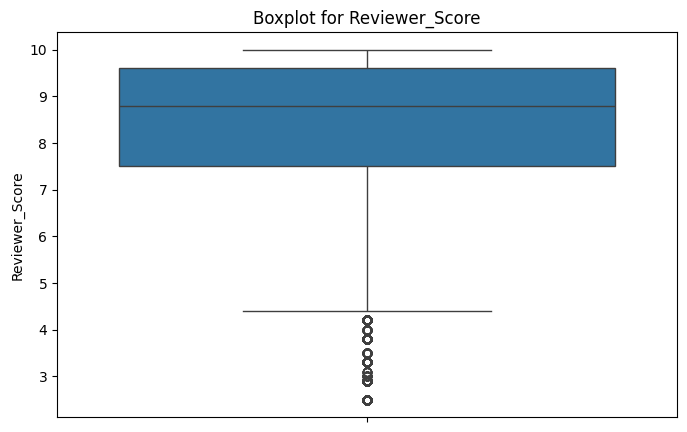

In [314]:
# visualization of outliers for the 'Reviewer_Score' column
plt.figure(figsize=(8, 5))
# creating a box with whiskers
sns.boxplot(hotels_cleaned['Reviewer_Score'])
# setting the title
plt.title('Boxplot for Reviewer_Score')
# displaying the boxplot
plt.show()

Arvostelut ovat pääosin positiivisia. Havaittavissa on pieni määrä erittäin alhaisia pisteitä, jotka voivat viitata vakaviin ongelmiin joissakin hotelleissa tai vieraiden erityisiin negatiivisiin kokemuksiin.

Tutkitaan negatiivisia kokemuksia laskemalla ensin raja-arvon 10%:lle alhaisimmat arvostelut saaneille hotelleille. Sitten valitaan ja ryhmitetään kaikki hotellit joiden arvostelu on yhtä kuin tai alle raja-arvoa ja sjoitetaan he laskevaan järjestykseen eniten arvosteluja saaneesta hotellista alkaen.

In [315]:
# calculating the 10% of the total number of reviews with the lowest ratings
lower_score_threshold = hotels_cleaned['Reviewer_Score'].quantile(0.10)
print(f"10% of the total number of reviews with the lowest ratings under {lower_score_threshold}")

# selecting reviews with scores below the 10% threshold for further analysis
reviews_below_threshold = hotels_cleaned[hotels_cleaned['Reviewer_Score'] <= lower_score_threshold]

# Counting low-score reviews for each hotel and sorting them
hotels_low_scores_count = reviews_below_threshold.groupby('Hotel_Name').size().reset_index(name='Low_Score_Count')
hotels_low_scores_sorted = hotels_low_scores_count.sort_values(by='Low_Score_Count', ascending=False)

# Including the original average score for each hotel
hotels_avg_score = hotels_cleaned[['Hotel_Name', 'Average_Score']].drop_duplicates()

# Merging to include average scores alongside the count of low-score reviews
hotels_low_scores_detailed = pd.merge(hotels_low_scores_sorted, hotels_avg_score, on='Hotel_Name', how='left')

# Displaying the merged DataFrame
print("Hotels with the highest number of reviews below the 10% threshold, including their overall average scores:")
display(hotels_low_scores_detailed.head(10))


10% of the total number of reviews with the lowest ratings under 5.8
Hotels with the highest number of reviews below the 10% threshold, including their overall average scores:


,Hotel_Name,Low_Score_Count,Average_Score
0,Britannia International Hotel Canary Wharf,1650,7.1
1,Hilton London Metropole,696,7.5
2,Grand Royale London Hyde Park,607,7.7
3,Millennium Gloucester Hotel London,505,7.8
4,Holiday Inn London Kensington,476,7.8
5,Strand Palace Hotel,463,8.1
6,The Cumberland A Guoman Hotel,455,7.5
7,Bloomsbury Palace Hotel,428,6.8
8,Shaftesbury Premier London Paddington,413,7.3
9,Henry VIII,398,7.0


Kuten voimme huomata, vaikka jotkut hotellit ovatkin saaneet virallisesti korkean pistemäärän aiemmin, ne voivat silti saada merkittävän määrän kielteisiä arvosteluja ja alhaisia arvosanoja matkustajilta. Tämä korostaa, kuinka tärkeää on tunnistaa ne yksityiskohdat, jotka vaativat tarkempaa huomiota ja mahdollista korjausta. Syvempää analyysia voisi totetuttaa esimerkiksi tekstianalyysin avulla, joka mahdollistaisi paremman ymmärryksen vieraiden kohtaamista ongelmista sekä myös auttaa parantamaan palvelun laatua ja asiakastyytyväisyyttä.

In [316]:
# сonverting Review_Date from string to datetime format
hotels_cleaned['Review_Date'] = pd.to_datetime(hotels_cleaned['Review_Date'], errors='coerce')

# checking the first few rows to verify the conversion
hotels_cleaned['Review_Date'].head()

0   2017-08-03
1   2017-08-03
2   2017-07-31
3   2017-07-31
4   2017-07-24
Name: Review_Date, dtype: datetime64[ns]

In [317]:
# checking for impossible dates
future_dates = hotels_cleaned[hotels_cleaned['Review_Date'] > pd.Timestamp.now()]
print(f"Number of future dates: {len(future_dates)}")

very_old_dates = hotels_cleaned[hotels_cleaned['Review_Date'] < pd.Timestamp('1990-01-01')]
print(f"Number of very old dates: {len(very_old_dates)}")

Number of future dates: 0
Number of very old dates: 0


Luodaan kartta

In [318]:
# checking if any latitude values are out of the realistic range of -90 - 90
invalid_latitude = hotels_cleaned[(hotels_cleaned['Latitude'] < -90) | (hotels_cleaned['Latitude'] > 90)]
print(f"Rows with invalid latitude values: {len(invalid_latitude)}")

# checking if any longitude values are out of the realistic range of -180 - 180
invalid_longitude = hotels_cleaned[(hotels_cleaned['Longitude'] < -180) | (hotels_cleaned['Longitude'] > 180)]
print(f"Rows with invalid longitude values: {len(invalid_longitude)}")

Rows with invalid latitude values: 0
Rows with invalid longitude values: 0


In [319]:
# selecting only numerical columns from the original DataFrame
numerical_hotels = hotels_cleaned.select_dtypes(include=['int64', 'float64'])
# adding the 'Hotel_Name' column to perform groupby
numerical_hotels['Hotel_Name'] = hotels_cleaned['Hotel_Name']
# creating an additional DataFrame with mean values for each hotel
hotels_unique = numerical_hotels.groupby('Hotel_Name').mean()
# resetting index to make Hotel_Name a column again
hotels_unique.reset_index(inplace=True)
# checking random few rows of the new DataFrame to verify
display(hotels_unique.head(5))

,Hotel_Name,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Longitude,Latitude,Total_Words
0,11 Cadogan Gardens,101.0,8.7,15.528302,393.0,19.974843,7.226415,8.845283,-0.159235,51.493616,35.503145
1,1K Hotel,69.0,7.7,24.932432,663.0,15.601351,9.141892,7.861486,2.365874,48.863932,40.533784
2,25hours Hotel beim MuseumsQuartier,391.0,8.8,16.161103,4324.0,21.911466,8.722787,8.983309,16.354630,48.206474,38.072569
3,41,66.0,9.6,8.883495,244.0,25.300971,6.009709,9.711650,-0.143649,51.498147,34.184466
4,45 Park Lane Dorchester Collection,27.0,9.4,6.750000,68.0,11.535714,7.214286,9.603571,-0.151536,51.506371,18.285714


In [320]:
# counting the number of unique coordinate pairs (latitude and longitude)
unique_coords_count = hotels_unique[['Latitude', 'Longitude']].drop_duplicates().shape[0]

# total number of records in the dataset
total_records_count = hotels_unique.shape[0]

# displaying information about the number of unique coordinates and the total number of records
print(f"Total number of records: {total_records_count}")
print(f"Number of unique coordinate pairs: {unique_coords_count}")

# checking for duplicate coordinates
if unique_coords_count < total_records_count:
    print(f"There are {total_records_count-unique_coords_count} duplicate coordinates in the dataset.")
else:
    print("There are no duplicate coordinates in the dataset.")


Total number of records: 1492
Number of unique coordinate pairs: 1486
There are 6 duplicate coordinates in the dataset.


In [324]:
# pip3 install folium
import folium
import random

# сreating a map centered around the center of London
map_hotels = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

def jitter(value):
    """Adds a small random offset to coordinates for visual separation."""
    return value + random.uniform(-0.0005, 0.0005)

# applying the jitter function to coordinates before adding markers
for _, row in hotels_unique.sample(30).iterrows():
    folium.CircleMarker(
        location=[
            jitter(row['Latitude']),
            jitter(row['Longitude'])
        ],
        radius=5,
        popup=row['Hotel_Name'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map_hotels)

# displaying the map
map_hotels

In [322]:
# saving the cleaned DataFrame to a CSV file
hotels_cleaned.to_csv('hotel_reviews_cleaned.csv', index=False)

______________